In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn
%matplotlib inline
from sklearn.model_selection import train_test_split     
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('C:/Users/KIIT/OneDrive/Desktop/6th sem projects/credit card fraud detection/creditcard.csv')
df.head()
# First 5 rows
df.tail()   #Last 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
# df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#Checking the number of missing values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# Distribution of legit  &&  Fraudulent Transactions
df['Class'].value_counts()

# 0  -> Normal Transaction
# 1  -> Fradulent Transaction

0    284315
1       492
Name: Class, dtype: int64

In [10]:
no_fraud = df[df['Class'] == 1]
number_fraud = len(df[df.Class == 1])
no_no_fraud = df[df['Class'] == 0]
number_no_fraud = len(df[df.Class == 0])

In [11]:
print(number_fraud)

492


In [12]:
print(number_no_fraud)

284315


# Matplotlib for data visualization and EDA

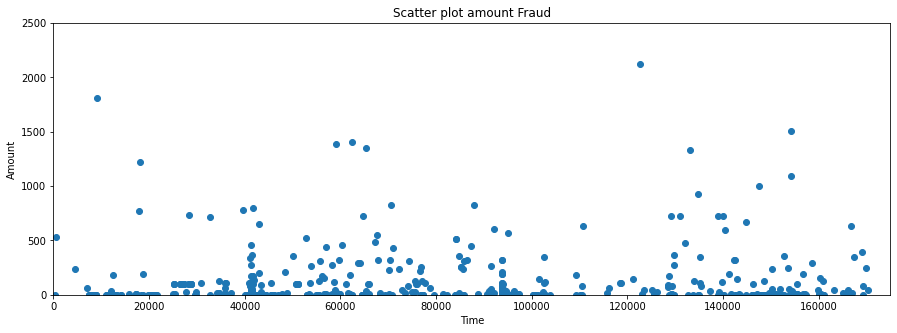

In [13]:
df_fraud = df[df['Class'] == 1]       #Recovery of Fraud data
plt.figure(figsize = (15,5))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])  #displaying fraud datasets according to the timing of the data
plt.title('Scatter plot amount Fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0, 175000])
plt.ylim([0, 2500])

plt.show()

We can't feed this data in our Machine Learning Model. Cause for only '0' values there is more than 2 lakh data.
As fraud data points are very less.

# As the dataset is highly unbalanced so we need to balance it in 2 separate transactions

In [14]:
#  0 -> NORMAL DISTRIBUTION
#  1 -> FRAUDULENT DISTRIBUTIONS
# Separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [15]:
print(legit.shape)     # Rest all 284315 data are legit type.

(284315, 31)


In [16]:
print(fraud.shape)       # Only 492 data are fraudulent

(492, 31)


In [17]:
# Statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
# Compare the values of both of these transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [20]:
# Dealing with unbalanced data  more than 2 lakh data
# So we are using Under-Sampling Method

# Building a  sample dataset containing similar distributions
# of normal transactions and fraudulent transactions.

# BUILD A SAMPLE DATASET CONTAINING SIMILAR DISTRIBUTIONS
# OF NORMAL TRANSACTIONS AND FRAUDULENT TRANSACTIONS

Normal legit Transactions are taken : 492 
As Fraudulent transaction number is 492.
So we are collecting only those 492 datasets from the 4 lakh dataset.

In [21]:
legit_sample = legit.sample(n = 492)
#randomly the 492 datasets are being taken in concatenating

In [22]:
# Concatenating of two dataframes
# Axis = 0 is given to concat all the row values one by one

new_dataset = pd.concat([legit_sample, fraud], axis = 0)

In [23]:
# print(new_dataset)
new_dataset.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
254860,156948.0,-0.096979,-0.137640,0.729204,-1.295986,-0.105474,0.935541,-0.875226,-0.399578,-0.710269,...,1.003611,0.394128,-0.509440,-1.140972,1.355837,0.332827,0.138839,0.163633,54.00,0
256759,157843.0,1.487418,-1.323441,-0.798170,0.302493,-0.742597,-0.034375,-0.289082,-0.071228,1.399081,...,0.333484,0.585397,-0.102529,0.649220,-0.204641,0.070424,-0.037091,0.012262,283.09,0
28373,34976.0,-0.894049,1.205385,-0.168480,-0.830064,0.161660,-0.013997,1.447914,-0.088560,0.649609,...,-0.225837,-0.027687,-0.257642,-0.995068,-0.149433,0.342312,0.180206,-0.215901,122.01,0
21776,31851.0,-1.729758,-1.621176,2.177632,1.150548,1.136627,-0.398054,-1.321851,0.540912,0.540749,...,0.172479,0.028873,0.358806,-0.432656,-0.355263,0.480528,0.064828,0.165444,63.74,0
119970,75655.0,-3.678716,4.122485,-1.419054,-0.128100,-0.128107,-0.900037,1.026856,-0.174981,2.951251,...,-0.444935,0.430697,0.206986,0.020717,0.044245,-0.392418,1.615018,0.537842,3.79,0
201294,133823.0,-0.248354,0.818560,0.192115,-0.720319,0.207939,-0.821582,0.762821,0.084976,0.193260,...,-0.252599,-0.612283,0.111244,-0.049322,-0.564253,0.132489,0.342629,0.142263,8.97,0
208543,137161.0,-0.039117,0.185408,0.534199,-0.518384,0.507762,-1.047191,0.349572,-0.379814,0.963898,...,0.375585,1.625604,0.138234,0.105080,-1.976533,-0.638483,0.425550,0.201312,12.18,0
102084,68047.0,-0.377307,1.124013,1.587981,2.655368,0.688773,0.329955,1.205755,-0.388010,-1.493243,...,-0.255742,-0.435824,0.212018,0.169070,-0.920654,-0.255362,-0.373513,-0.322672,35.02,0
284537,172540.0,-2.944587,3.371321,-3.218726,-0.680454,-0.990116,-0.976945,-1.155017,2.387401,-0.064353,...,0.418261,1.031411,0.128593,-1.038539,-0.249787,-0.115942,0.285577,0.240771,1.29,0
280117,169329.0,2.118775,-0.171389,-3.540061,-1.077068,2.960780,2.697223,0.161899,0.497351,0.052801,...,0.145658,0.449285,-0.002268,0.759934,0.474666,0.261302,-0.067038,-0.085419,3.85,0


In [24]:
new_dataset.tail()
# Fraudulent transactions

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [25]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [26]:
# Grouping the whole new dataset into according to their mean
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,99506.310976,-0.080879,0.033759,-0.078633,0.029238,0.053797,-0.047913,0.018436,0.061569,-0.063860,...,0.029740,-0.014477,0.041429,0.015790,-0.007398,-0.004684,-0.031247,0.009438,-0.010600,89.748984
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [27]:
#Splitting the data into feautures && targets
X = new_dataset.drop(columns = 'Class', axis = 1)
Y = new_dataset['Class']
Y

254860    0
256759    0
28373     0
21776     0
119970    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

# Axis = 1 represents  column
# Axis = 0 represents  row

# Split the data into training  && Testing

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

#so 787 total data is trained data  &&  197 data is test data

(984, 30) (787, 30) (197, 30)


# Logistic Regression Model for Binary classification problem

In [30]:
model_logistic = LogisticRegression()

In [31]:
# Training the Logistic regression model with training data
model_logistic.fit(X_train, Y_train)

LogisticRegression()

In [32]:
print(Y.shape, Y_train, Y_test)

(984,) 100623    1
32053     0
114498    0
262995    0
211831    0
         ..
240238    0
175654    0
223618    1
43061     1
23796     0
Name: Class, Length: 787, dtype: int64 247995    1
108091    0
120514    0
186557    0
15451     1
         ..
108258    1
12108     1
99506     1
74496     1
54576     0
Name: Class, Length: 197, dtype: int64


# Model evaluation based on accuracy score

In [33]:
# As model are trained in X-train data it will chexck 
# from accuracy value predicted by our model

#Accuracy on training data

X_train_prediction = model_logistic.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(training_data_accuracy)

0.9415501905972046


In [34]:
print('Accuracy on Training Data : ', training_data_accuracy)

Accuracy on Training Data :  0.9415501905972046


In [64]:
# So predictions of accuracy score we got in case of training data is = 92%
# so this is very good

# So previously e created trained prediction
# No we have to create the test based prediction and accuracy checking


In [65]:
X_test_prediction = model_logistic.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy in Testing data : ", testing_data_accuracy)

Accuracy in Testing data :  0.9187817258883249


In [66]:
# If the training and testing datasets accuaracy is
# different then it will be gone for overfit or underfit

# USING DECISION TREE MODEL ACCURACY CHECKING

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [68]:
# pip install graphviz

In [69]:
### PREDICTION AND EVALUATION WE NEED TO PREDICT OUR DECISION TREE AND USING GRAPHVIZ WE CAN DRAW DIAGRAMS


# Using DecisionTreeClassifier

In [70]:
dtree = DecisionTreeClassifier(criterion = 'entropy', random_state =1, max_depth =5)

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [72]:
dtree

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

### Fit the data using training dataset and calculate accuarcy of both train and test data

In [73]:
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

In [74]:
dtree.score(X_train, Y_train)

0.9618805590851334

In [75]:
#Now testing the model

dtree.score(X_test, Y_test)

0.9086294416243654

### Below the visulaization is done of Random Forest and DecisionTreeClassifier.

### Calculating training and testing score>>>
### Predictions and Evaluation Let's evaluate our decision tree

In [76]:
predictions1 = dtree.predict(X_train)
print("Confusion Matrix for Trained data in Decision Tree: ")
print("\n")
print(confusion_matrix(Y_train, predictions1))

print("\n")

print(classification_report(Y_train, predictions1))

Confusion Matrix for Trained data in Decision Tree: 


[[385   8]
 [ 22 372]]


              precision    recall  f1-score   support

           0       0.95      0.98      0.96       393
           1       0.98      0.94      0.96       394

    accuracy                           0.96       787
   macro avg       0.96      0.96      0.96       787
weighted avg       0.96      0.96      0.96       787



In [77]:
predictions1 = dtree.predict(X_test)

print("Confusion Matrix for Testing data in Decision Tree: ")
print("\n")

print(confusion_matrix(Y_test, predictions1))

print("\n")

print(classification_report(Y_test, predictions1))

Confusion Matrix for Testing data in Decision Tree: 


[[94  5]
 [13 85]]


              precision    recall  f1-score   support

           0       0.88      0.95      0.91        99
           1       0.94      0.87      0.90        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



In [78]:
# predictions2 = dtree.predict(Y_test)

# print(confusion_matrix(X_test, predictions2))
# print("\n")
# print(classification_report(X_test, predictions2))


In [79]:
import numpy as np
from sklearn.metrics import classification_report

predictions2 = dtree.predict(X_test)

# assuming X_test and predictions1 are arrays
Y_test = np.array(Y_test).reshape(-1)
predictions2 = np.array(predictions2).reshape(-1)
print(confusion_matrix(Y_test, predictions2))

print('\n')

print(classification_report(Y_test, predictions2))

[[94  5]
 [13 85]]


              precision    recall  f1-score   support

           0       0.88      0.95      0.91        99
           1       0.94      0.87      0.90        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



### As there it's coming an error so we need Random Forest to customize it.

In [80]:
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=50)

In [81]:
rfc_pred = rfc.predict(X_train)
rfc_train_acc = rfc.score(X_train, Y_train)
print("Training Accuracy: ", rfc_train_acc)

print(confusion_matrix(Y_train, rfc_pred))

print('\n')

print(classification_report(Y_train, rfc_pred))

Training Accuracy:  1.0
[[393   0]
 [  0 394]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       394

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787



In [82]:
# Prediction of Test data

rfc_pred = rfc.predict(X_test)
rfc_test_acc = rfc.score(X_test, Y_test)
print("Testing data accuracy: ", rfc_test_acc )

print(confusion_matrix(Y_test, rfc_pred))

print('\n')

print(classification_report(Y_test, rfc_pred))

Testing data accuracy:  0.9238578680203046
[[98  1]
 [14 84]]


              precision    recall  f1-score   support

           0       0.88      0.99      0.93        99
           1       0.99      0.86      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



### As accuracy and F1 score both coming better than Decision tree so we will use Random Forest

### Now we need to visualize random forest

[Text(0.39473684210526316, 0.9166666666666666, 'X[14] <= -2.279\nentropy = 1.0\nsamples = 787\nvalue = [393, 394]'),
 Text(0.10526315789473684, 0.75, 'X[12] <= -1.328\nentropy = 0.092\nsamples = 343\nvalue = [4, 339]'),
 Text(0.05263157894736842, 0.5833333333333334, 'entropy = 0.0\nsamples = 318\nvalue = [0, 318]'),
 Text(0.15789473684210525, 0.5833333333333334, 'X[8] <= -0.289\nentropy = 0.634\nsamples = 25\nvalue = [4, 21]'),
 Text(0.10526315789473684, 0.4166666666666667, 'X[0] <= 125337.0\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.05263157894736842, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.15789473684210525, 0.25, 'X[20] <= -0.32\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.10526315789473684, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21052631578947367, 0.08333333333333333, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.21052631578947367, 0.4166666666666667, 'entropy = 0.0\nsamples = 17\nvalue = [0,

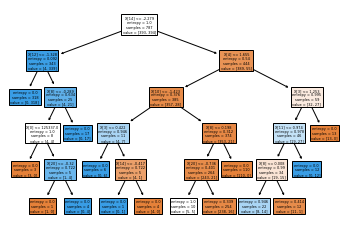

In [84]:
tree.plot_tree(dtree.fit(X_train, Y_train), filled = True)

[Text(0.36363636363636365, 0.9166666666666666, 'X[14] <= -1.547\nentropy = 1.0\nsamples = 197\nvalue = [99, 98]'),
 Text(0.2727272727272727, 0.75, 'entropy = 0.0\nsamples = 85\nvalue = [0, 85]'),
 Text(0.45454545454545453, 0.75, 'X[4] <= 1.127\nentropy = 0.518\nsamples = 112\nvalue = [99, 13]'),
 Text(0.2727272727272727, 0.5833333333333334, 'X[19] <= 1.05\nentropy = 0.26\nsamples = 91\nvalue = [87, 4]'),
 Text(0.18181818181818182, 0.4166666666666667, 'X[17] <= 0.8\nentropy = 0.155\nsamples = 89\nvalue = [87, 2]'),
 Text(0.09090909090909091, 0.25, 'entropy = 0.0\nsamples = 81\nvalue = [81, 0]'),
 Text(0.2727272727272727, 0.25, 'X[25] <= 0.179\nentropy = 0.811\nsamples = 8\nvalue = [6, 2]'),
 Text(0.18181818181818182, 0.08333333333333333, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.36363636363636365, 0.08333333333333333, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.36363636363636365, 0.4166666666666667, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6363636

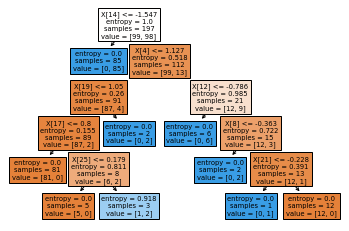

In [85]:
tree.plot_tree(dtree.fit(X_test,Y_test), filled = True)

# Using Support Vector Machine

In [86]:
scaler = StandardScaler()

In [87]:
scaler.fit(X_train)

StandardScaler()

In [88]:
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [89]:
classifier = svm.SVC(kernel = 'linear')

In [90]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [91]:
X_train_predict = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_predict)
print("Training data accuracy: ", training_data_accuracy)

Training data accuracy:  0.9542566709021602


In [92]:
X_test_predict = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_predict)
print("Accuracy of the test data: ", test_data_accuracy)

Accuracy of the test data:  0.9238578680203046


# XGBoost Classifier

In [35]:
# model_xgboost = xgb.XGBClassifier()

model_xgboost = xgb.XGBClassifier(n_estimators=100, max_depth=3, random_state=42)


In [36]:
model_xgboost.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [37]:
pred_xgboost = model_xgboost.predict(X_train)
accuracy_xgboost_train = accuracy_score(pred_xgboost, Y_train)
print(accuracy_xgboost_train)

1.0


In [38]:
pred_xgboost = model_xgboost.predict(X_test)
accuracy_xgboost_test = accuracy_score(pred_xgboost, Y_test)
print(accuracy_xgboost_test)

0.9137055837563451


# Visualization of Output of each trained model for particular diff ml models

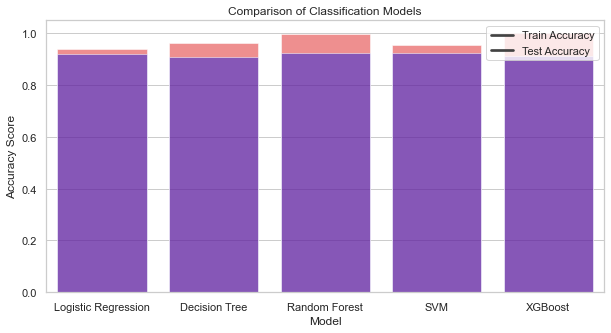

In [39]:
# Bar Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of models and their accuracy scores
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'XGBoost']
train_acc = [0.9415, 0.9618, 0.9987, 0.9542, 1.0000]
test_acc = [0.9187, 0.9086, 0.9239, 0.9238, 0.9137]

# Create a DataFrame from the lists
data = {'Model': models, 'Train Accuracy': train_acc, 'Test Accuracy': test_acc}
df = pd.DataFrame(data)

# Set the figure size and style
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

# Plot the grouped bar chart
sns.barplot(x="Model", y="Train Accuracy", data=df, color="red", alpha=.5)
sns.barplot(x="Model", y="Test Accuracy", data=df, color="blue", alpha=.5)

# Add labels and legend
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Classification Models")
plt.legend(labels=["Train Accuracy", "Test Accuracy"])

# Show the plot
plt.show()
